In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('sloth_data.csv')
df

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...,...
4995,4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...
4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [14]:
df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

In [17]:
df.isnull().any()

claw_length_cm    False
endangered        False
size_cm           False
specie            False
sub_specie        False
tail_length_cm    False
weight_kg         False
dtype: bool

In [18]:
df.describe(include='all')

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
count,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000.000000
unique,NaN,3,NaN,2,6,NaN,NaN
top,NaN,least_concern,NaN,three_toed,Hoffman’s two-toed sloth,NaN,NaN
freq,NaN,4390,NaN,2662,1198,NaN,NaN
mean,7.423503,NaN,60.399852,NaN,NaN,3.410544,5.253253
std,1.520533,NaN,5.929968,NaN,NaN,2.333288,1.268203
min,1.748000,NaN,46.928000,NaN,NaN,-2.942000,0.946000
25%,6.383750,NaN,59.904750,NaN,NaN,1.440250,4.382500
50%,7.445000,NaN,62.478500,NaN,NaN,3.812000,5.274000
75%,8.491500,NaN,64.398250,NaN,NaN,5.351250,6.125250


In [183]:
df.describe(include='object')

In [24]:
def convertcolumnsOtoC(columns_toConvert,df):
    dict_objectcolumns = {}
    
    for i in range(0, len(columns_toConvert),1):
        dict_objectcolumns[columns_toConvert[i]] = 'category'

    df_changed = df.astype(
        dict_objectcolumns
    )
    return df_changed

df = convertcolumnsOtoC(df.describe(include='object').columns,df)
df.dtypes

claw_length_cm     float64
endangered        category
size_cm            float64
specie            category
sub_specie        category
tail_length_cm     float64
weight_kg          float64
dtype: object

In [185]:
numbercol_names = df.describe(include = np.number).columns
categorycol_names = df.describe(include = 'category').columns

<Axes: xlabel='endangered', ylabel='count'>

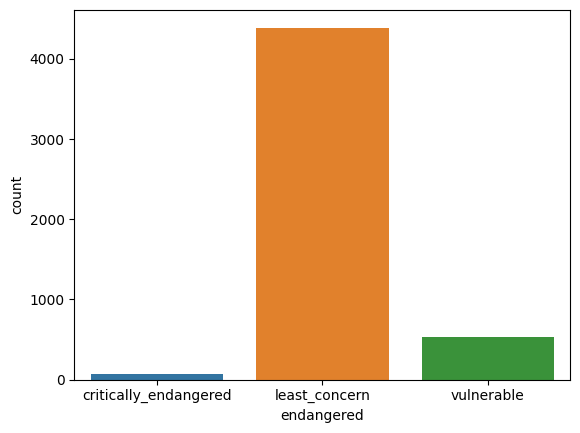

In [93]:
df.value_counts('endangered',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'endangered',y='count')))

<Axes: xlabel='specie', ylabel='count'>

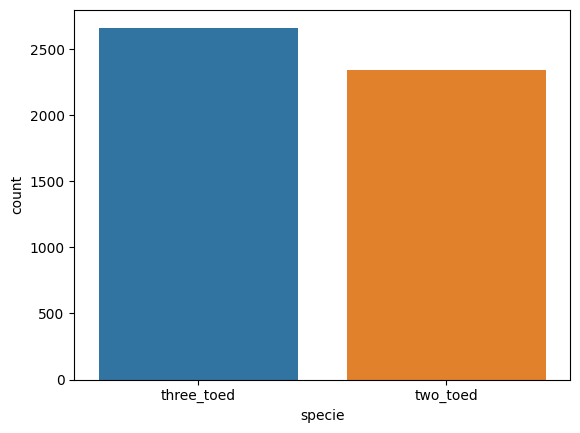

In [92]:
df.value_counts('specie',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'specie',y='count')))

<Axes: xlabel='sub_specie', ylabel='count'>

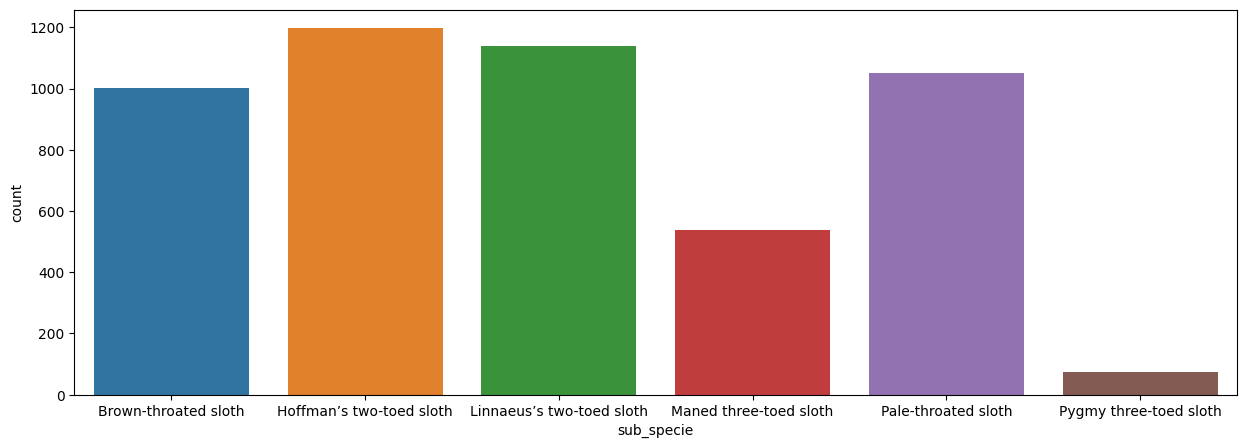

In [91]:
fig = plt.subplots(1,figsize=(15,5))

df.value_counts('sub_specie',sort=False).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'sub_specie',y='count')))

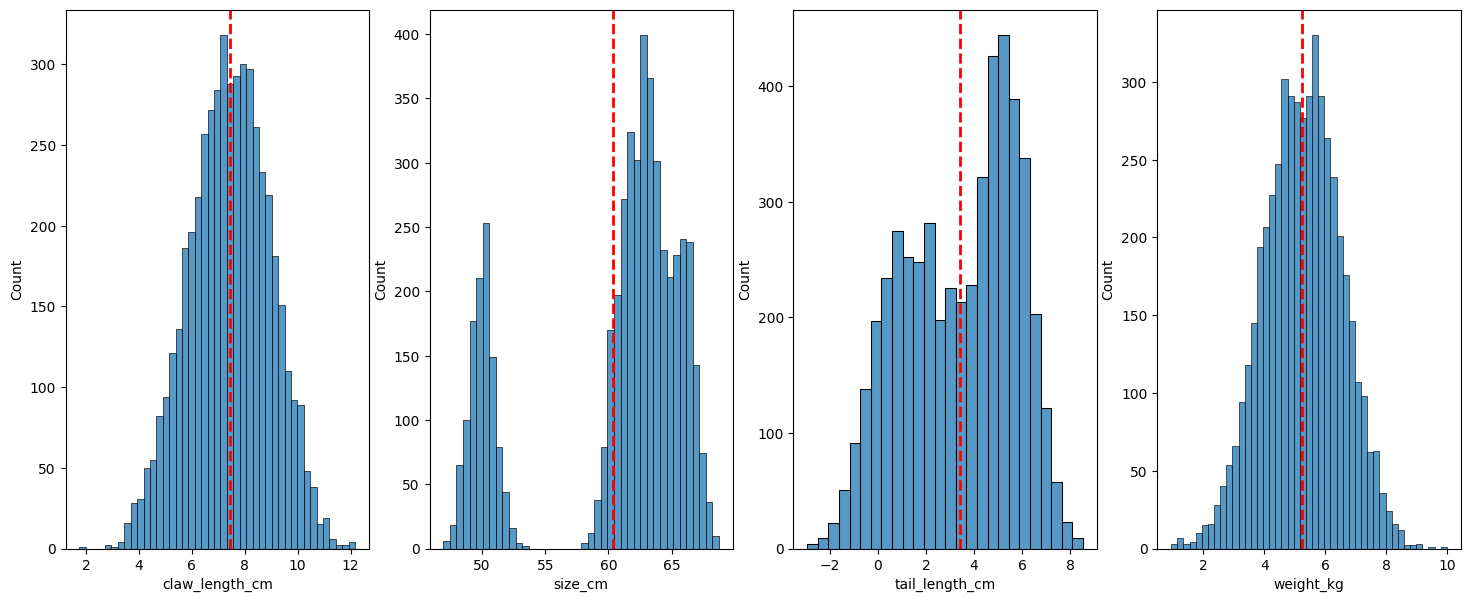

In [192]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.histplot(data=df, x=names, ax=axs[i])
    axs[i].axvline(x=df[names].mean(), color='red', linestyle='dashed', linewidth=2)
    i+=1


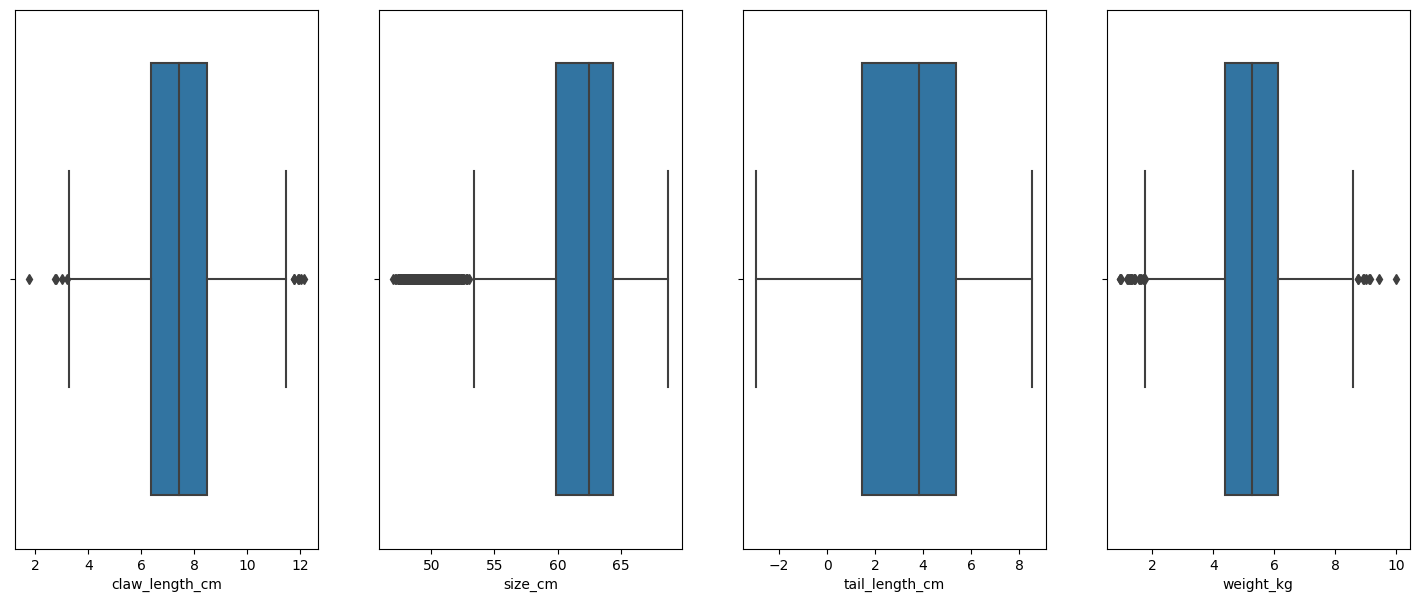

In [199]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x=names, ax=axs[i])
    i+=1


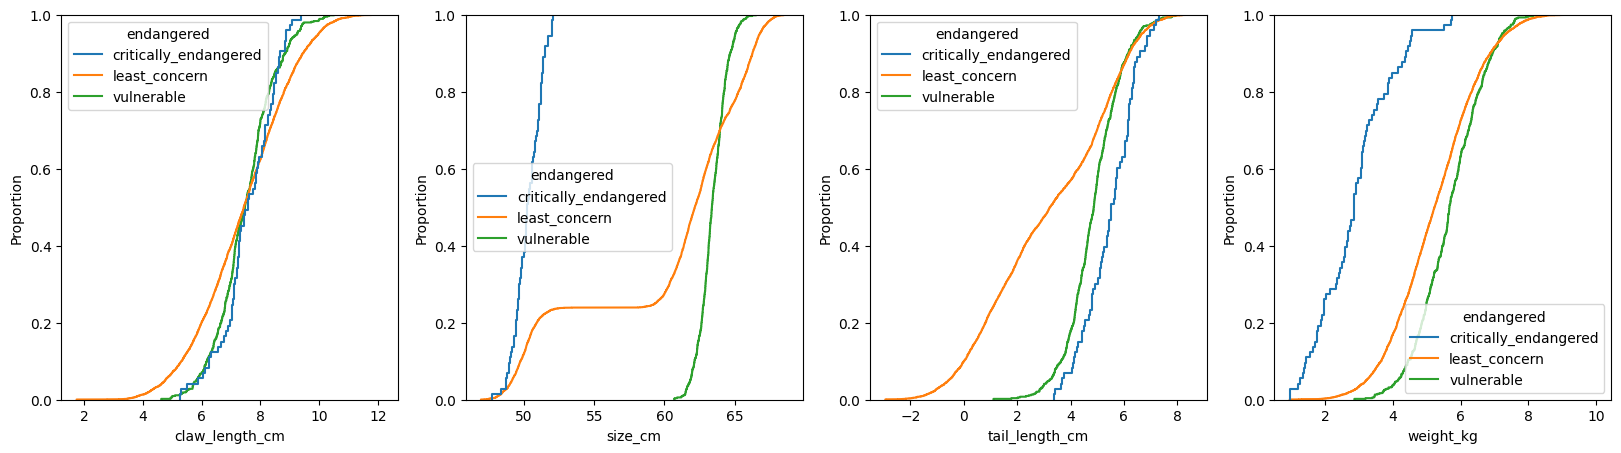

In [202]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='endangered')
    i+=1


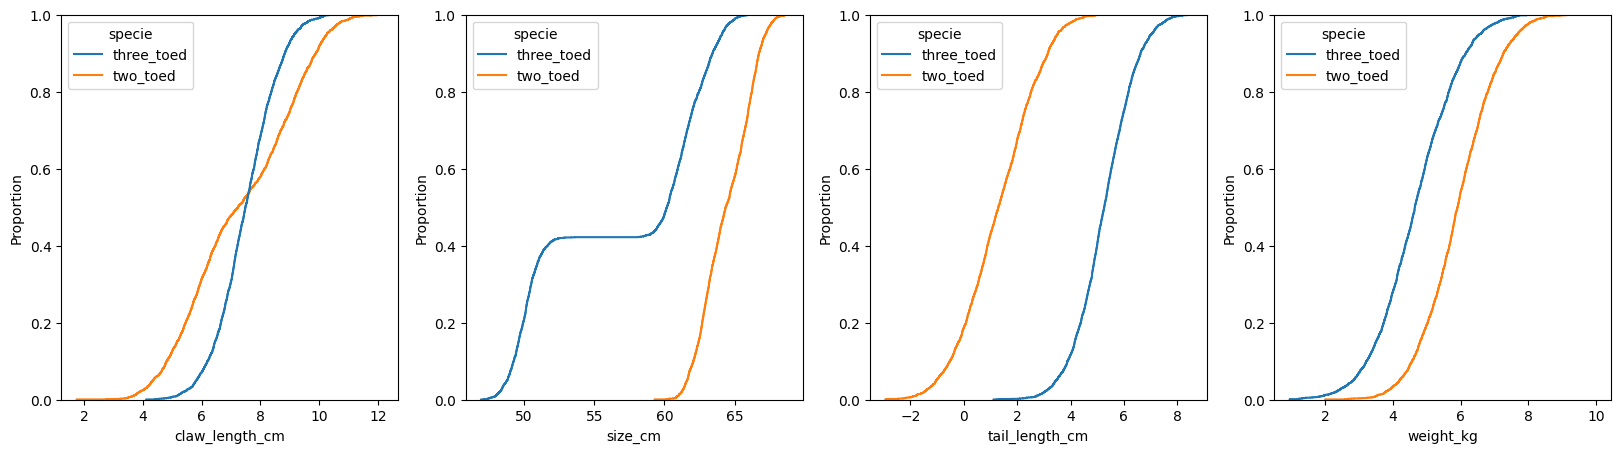

In [203]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='specie')
    i+=1


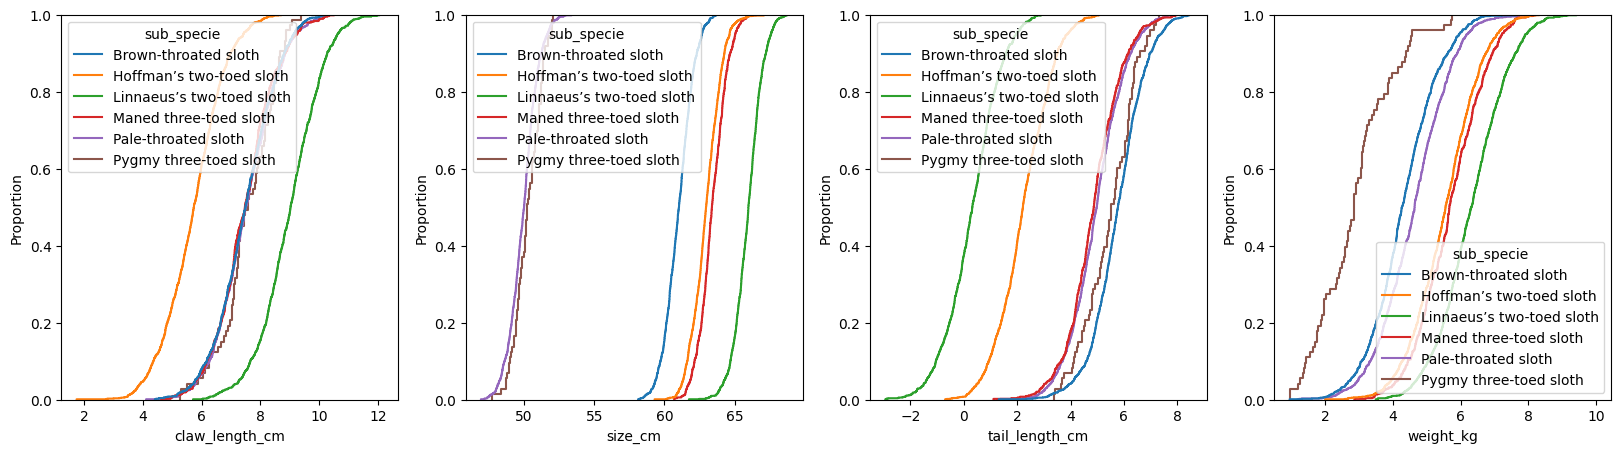

In [204]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='sub_specie')
    i+=1


c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


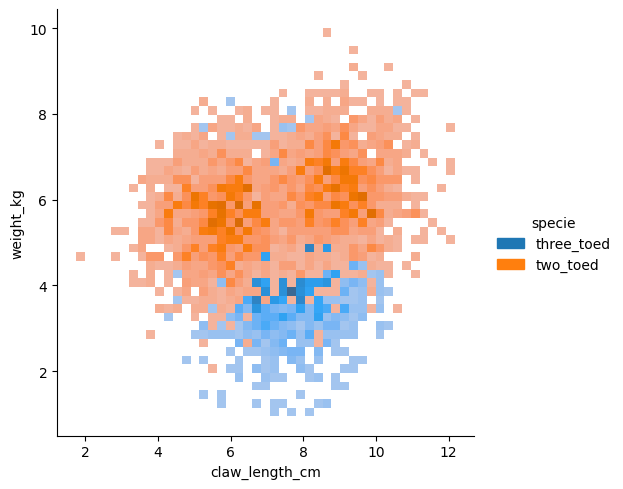

In [208]:
sns.displot(data= df, x= 'claw_length_cm', y='weight_kg', hue = 'specie')

<Axes: xlabel='claw_length_cm', ylabel='weight_kg'>

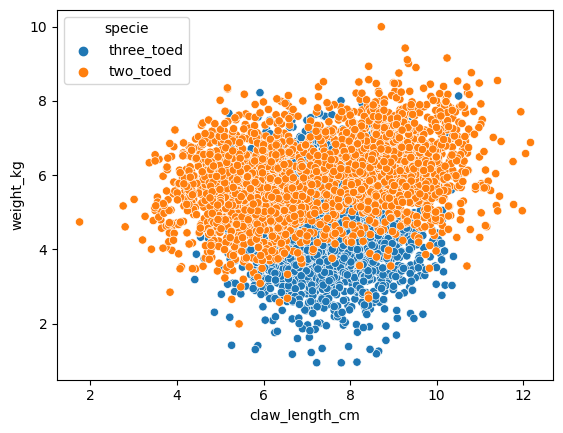

In [209]:
sns.scatterplot(data= df, x= 'claw_length_cm', y='weight_kg', hue = 'specie')

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


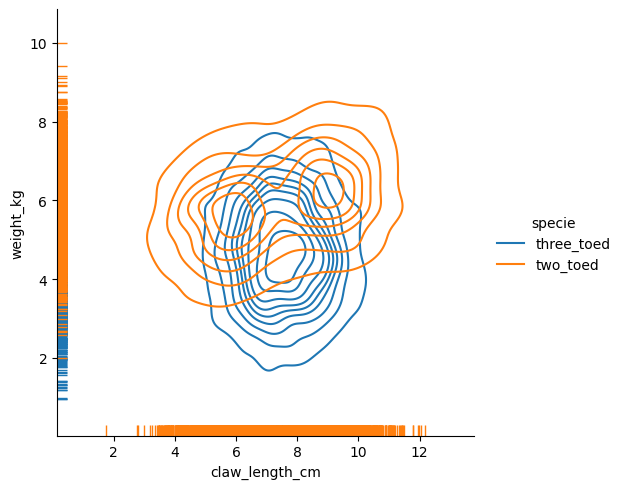

In [121]:
sns.displot(data= df, x= 'claw_length_cm', y='weight_kg', rug=True, hue = 'specie', kind='kde')

<Axes: xlabel='claw_length_cm', ylabel='weight_kg'>

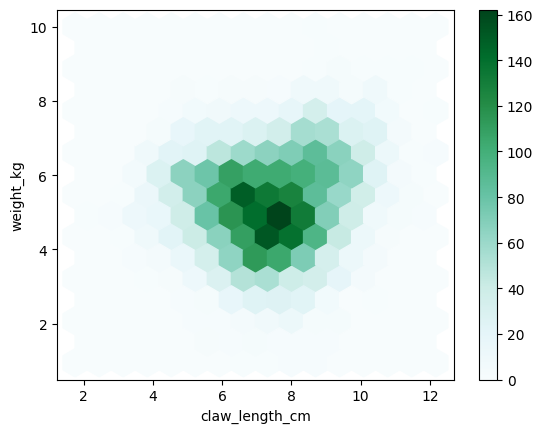

In [132]:
df.plot.hexbin(x= 'claw_length_cm', y= 'weight_kg',gridsize=15)

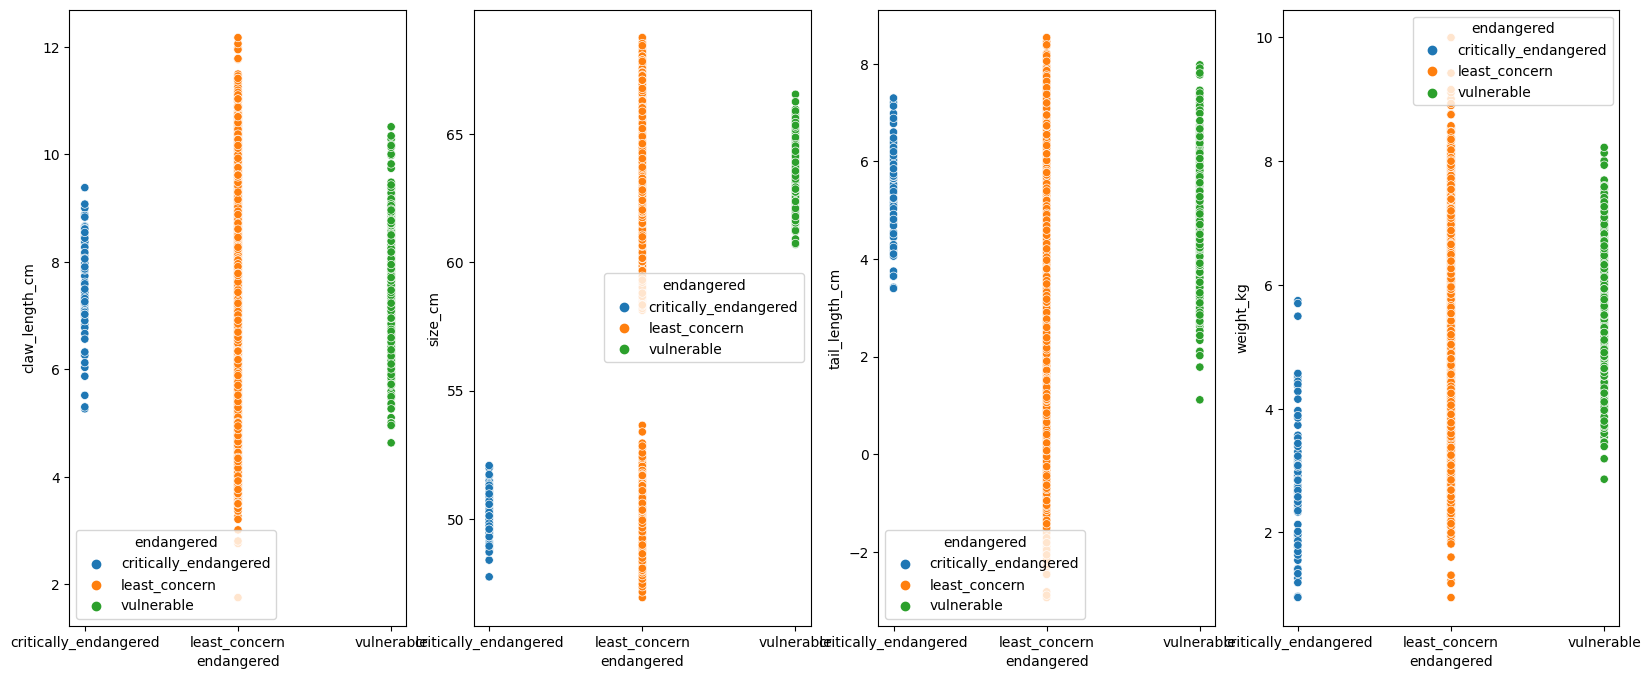

In [224]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,8))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='endangered', y=names, ax=axs[i], hue='endangered')
    i+=1


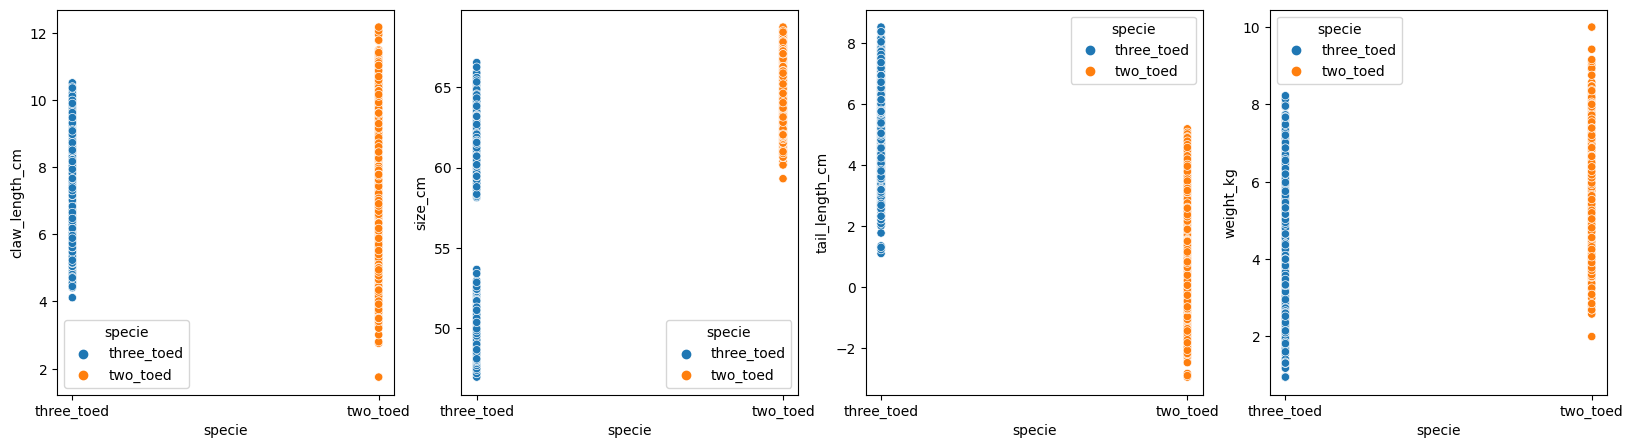

In [215]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    i+=1


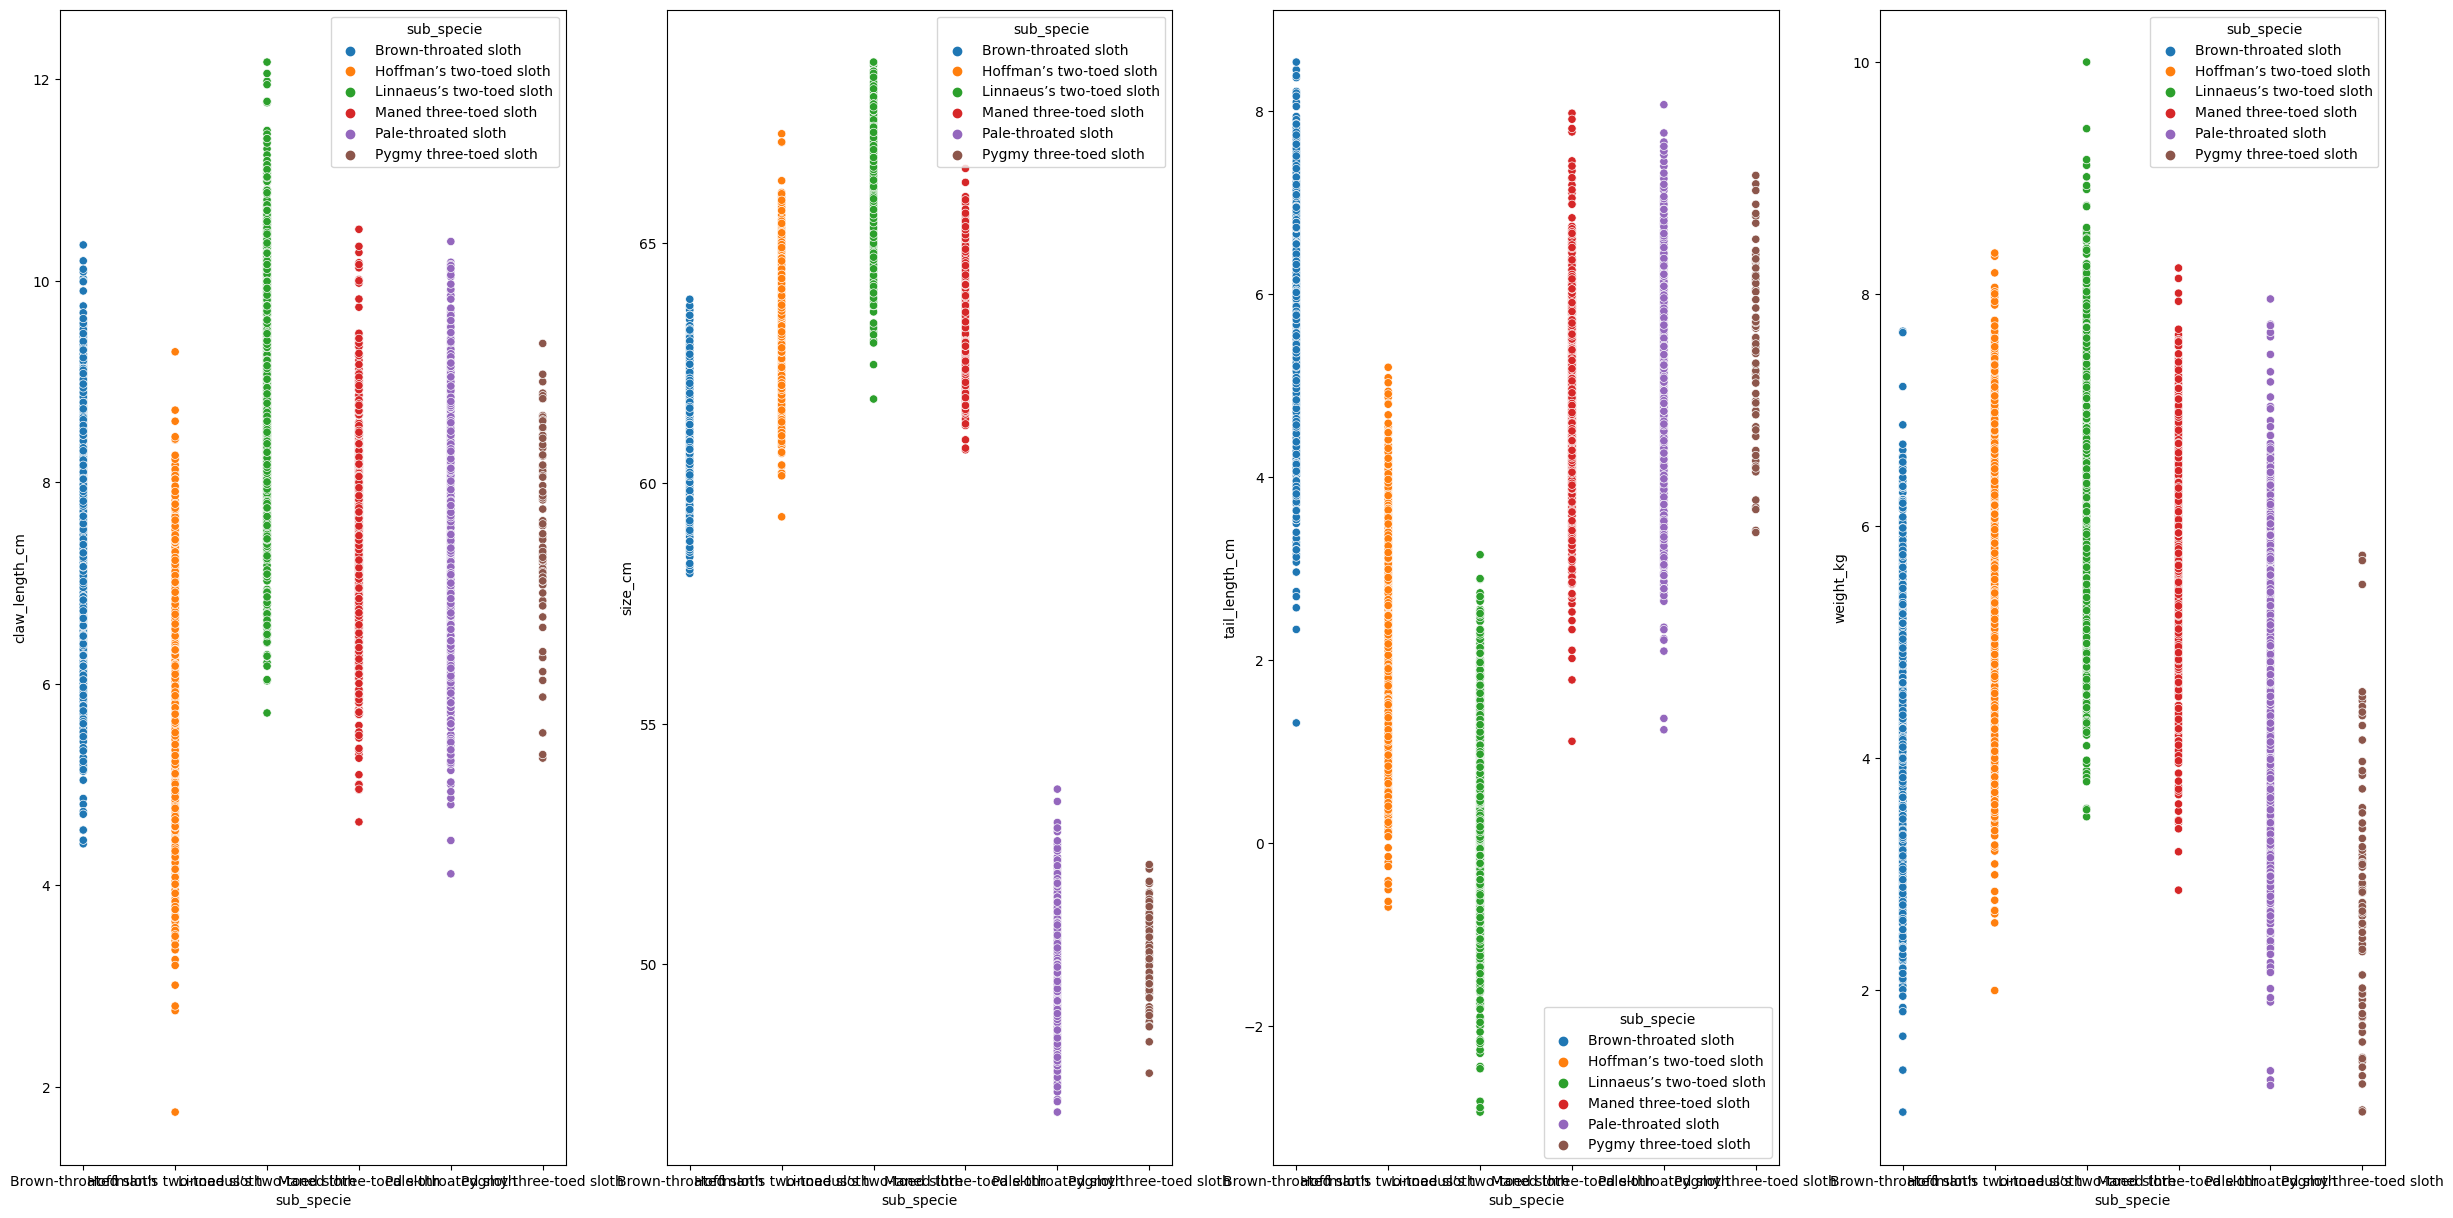

In [222]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (30,15))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='sub_specie', y=names, ax=axs[i], hue='sub_specie')
    i+=1


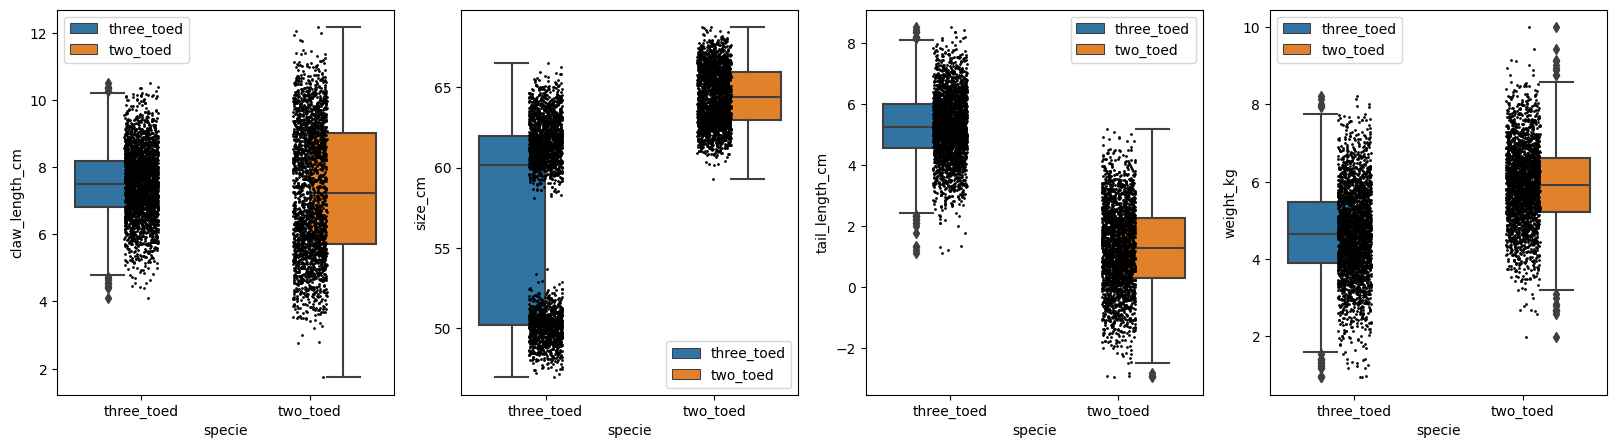

In [228]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    sns.stripplot(data=df, x='specie', y=names, ax=axs[i], color='black', size=2)
    i+=1


<Axes: xlabel='specie', ylabel='claw_length_cm'>

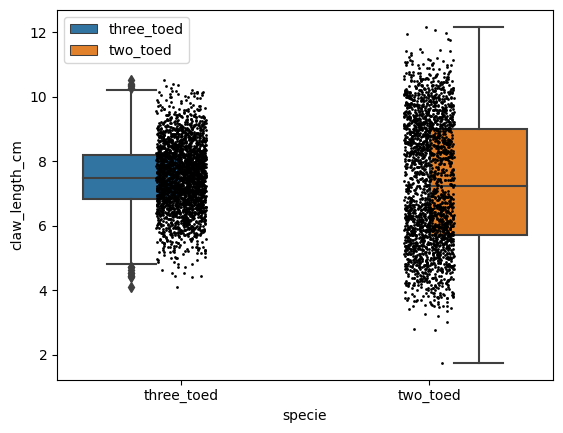

In [143]:
sns.boxplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

<Axes: xlabel='specie', ylabel='claw_length_cm'>

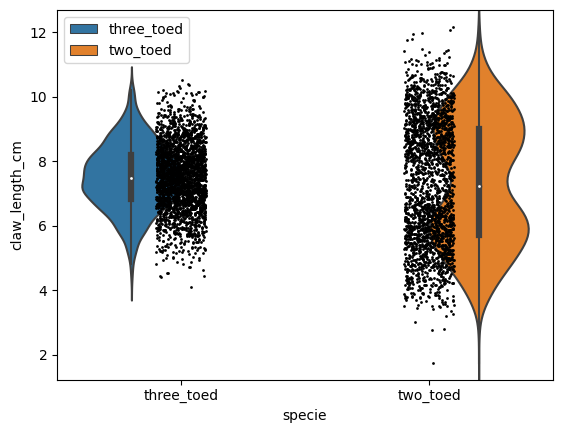

In [144]:
sns.violinplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='specie', ylabel='claw_length_cm'>

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


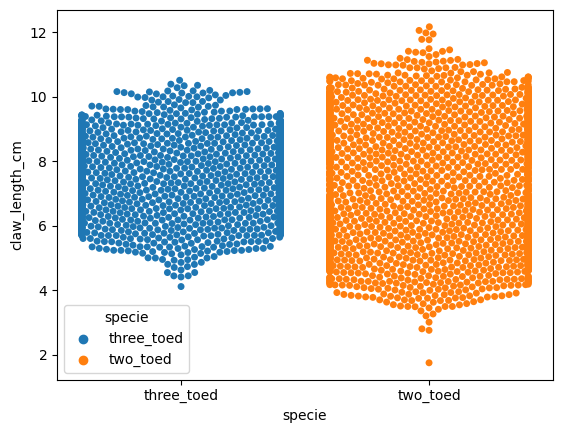

In [145]:
sns.swarmplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')

In [147]:
correlation_columns = df.describe(include=np.number).columns
correlation = df[correlation_columns].corr()
correlation

,claw_length_cm,size_cm,tail_length_cm,weight_kg
claw_length_cm,1.000000,0.079532,-0.153307,0.129315
size_cm,0.079532,1.000000,-0.551956,0.440112
tail_length_cm,-0.153307,-0.551956,1.000000,-0.505609
weight_kg,0.129315,0.440112,-0.505609,1.000000


<Axes: >

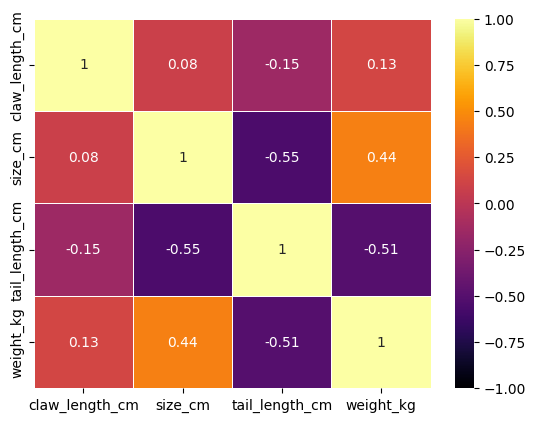

In [148]:
sns.heatmap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

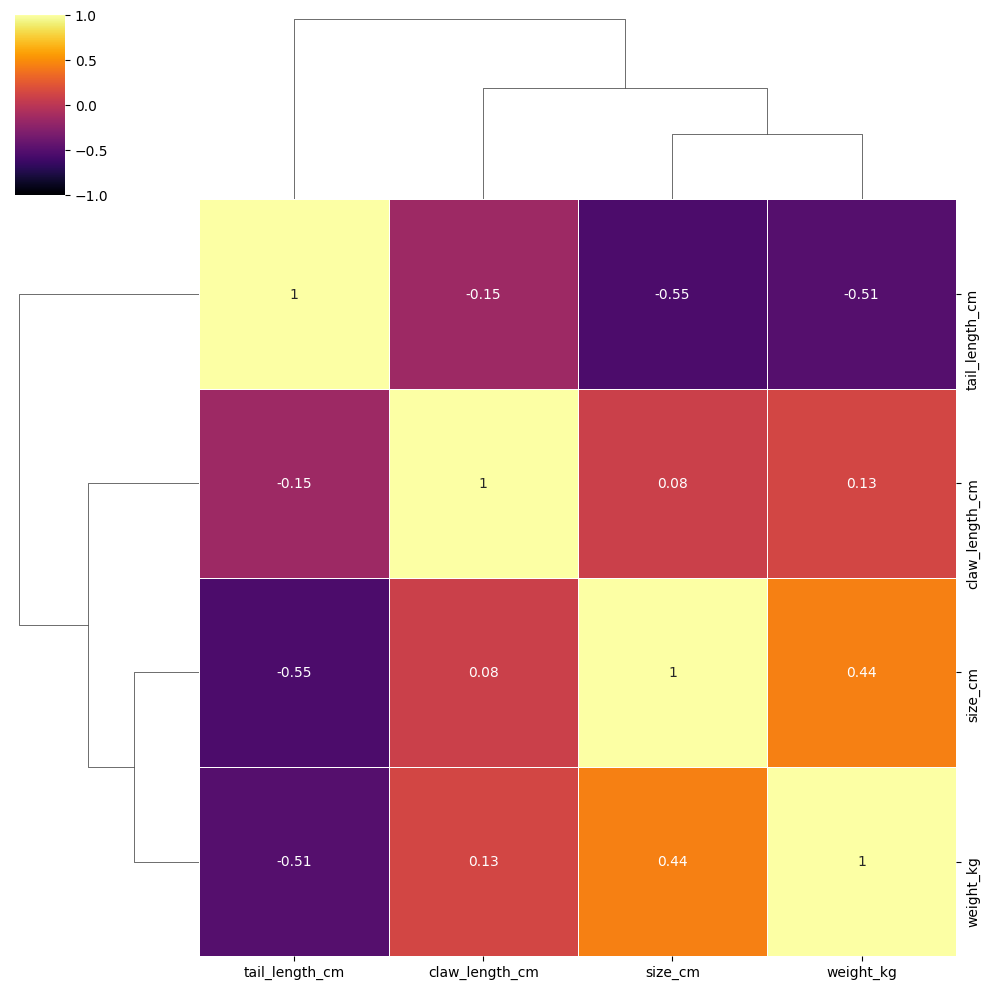

In [149]:
sns.clustermap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


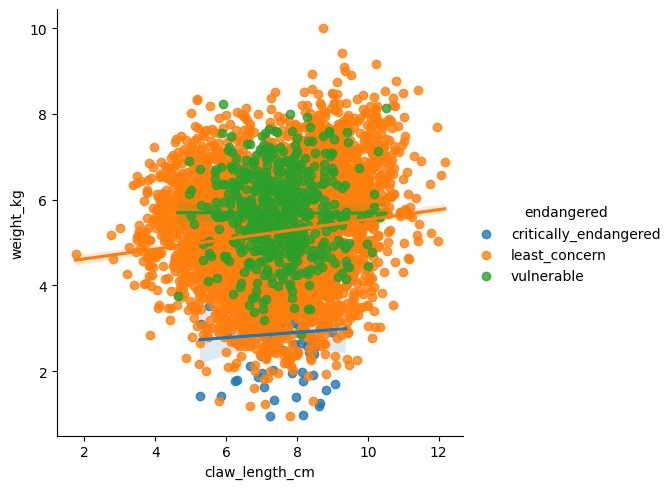

In [152]:
sns.lmplot(data = df, x = 'claw_length_cm', y = 'weight_kg', hue = 'endangered')

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


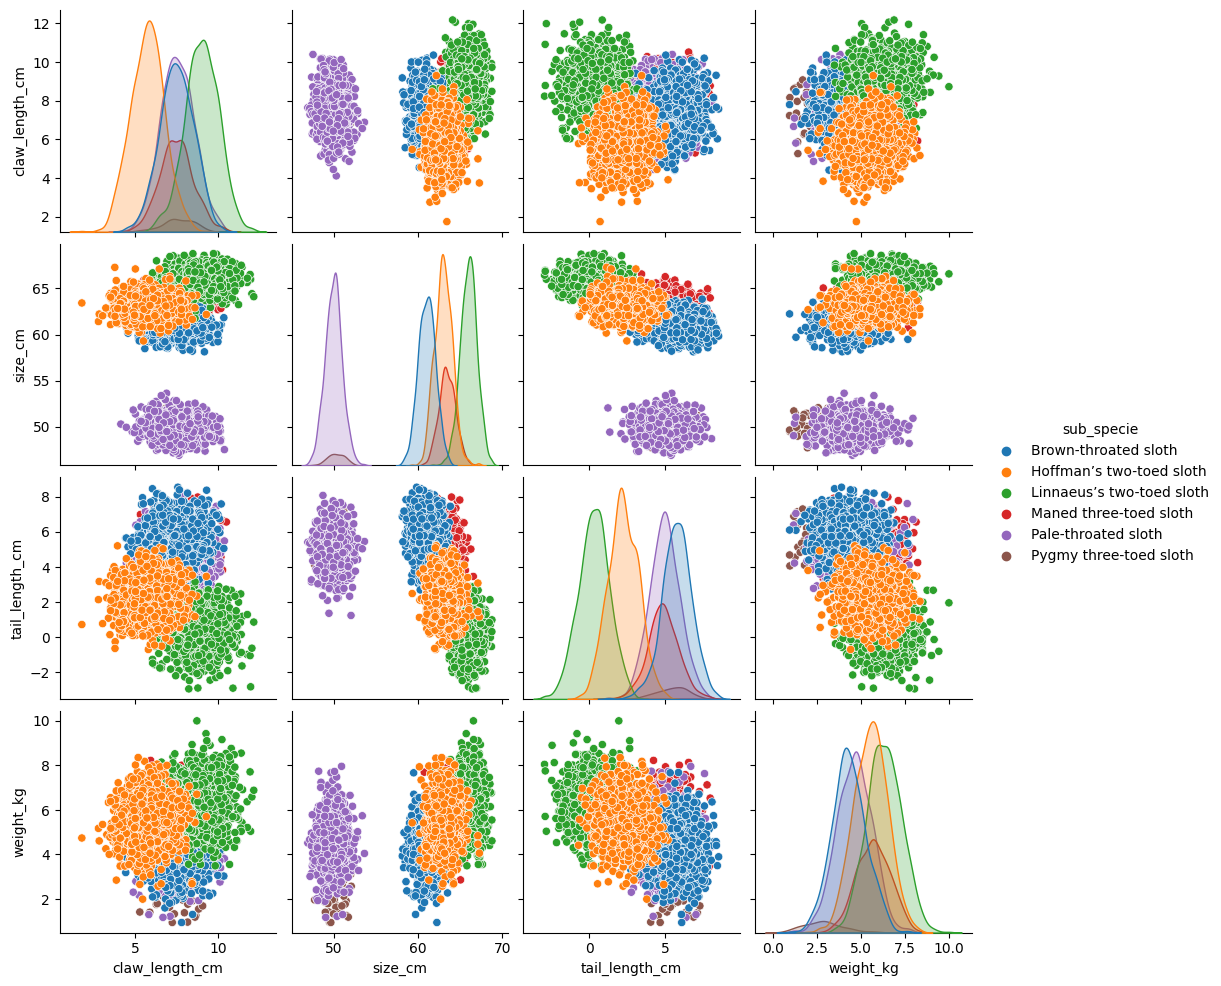

In [156]:
sns.pairplot(data =df, hue = 'sub_specie')